# imports

In [ ]:
import numpy as np # numpy.py 안에 있는 함수를 이용
import pandas as pd 
import matplotlib.pyplot as plt # matplotlib - pyplot.py 안에 있는 함수를 이용
import seaborn as sns

# tips 데이터 셋

In [ ]:
tips = sns.load_dataset('tips')

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [ ]:
tips.info

<bound method DataFrame.info of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

# Box plot

연속형 변수의 기술통계량 (최솟값, 최댓값, 사분위 값)

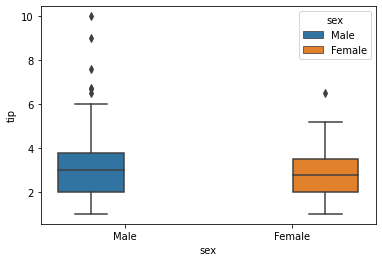

In [ ]:
sns.boxplot(data= tips, y= tips.tip, x= tips.sex, hue='sex')

plt.show()

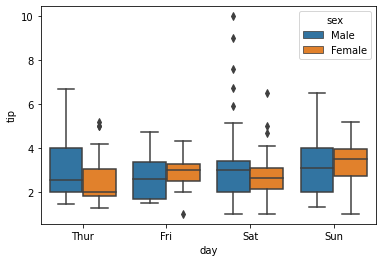

In [ ]:
sns.boxplot(data= tips, y= tips.tip, x= tips.day, hue='sex')

plt.show()

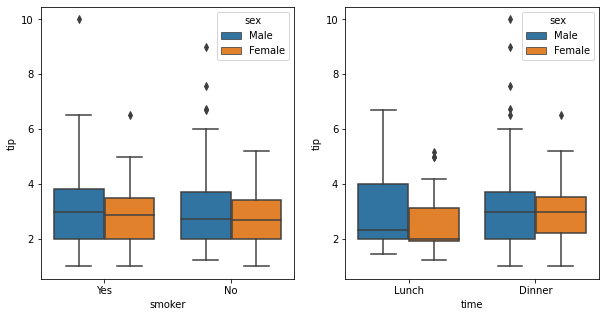

In [ ]:
# subplot을 2개 (1 x 2)
fig, ax = plt.subplots(1,2, figsize = (10,5))
# 흡연여부별 tip의 boxplot , 시간별 tip의 boxplot

sns.boxplot(data= tips, x = tips.smoker, y = tips.tip, hue = 'sex', ax = ax[0])

sns.boxplot(data= tips, x = tips.time, y = tips.tip, hue = 'sex', ax = ax[1])

# Histogram

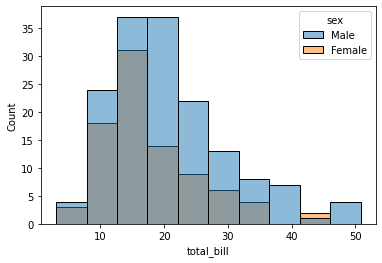

In [ ]:
sns.histplot(data = tips, x = tips.total_bill, hue='sex', bins = 10)

plt.show()

# Bar plot

## `countplot()` 

* 카테고리 타입 변수의 빈도수를 막대로 표현

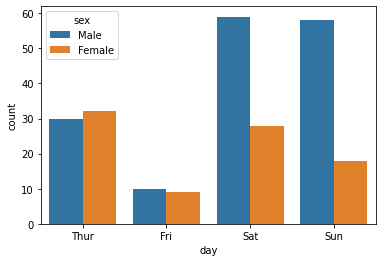

In [ ]:
sns.countplot(data = tips, x = 'day', hue = 'sex')

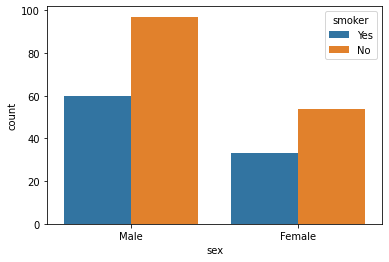

In [87]:
sns.countplot(data = tips, x = 'sex', hue = 'smoker')

## `barplot()`

* 그룹별 변수의 통계량(평균, 표준편차, 중앙값, 개수 ....) 을 막대로 시각화.
* 통계량 함수의 기본값은 mean. (estimator= np.mean)
* 카테고리 타입 변수와 연속형 변수를 함게 시각화.


sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64


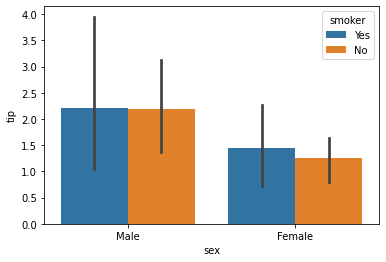

In [107]:
x = tips.groupby('sex').tip.mean()
print(x)

# 성별 / tip의 최댓값
sns.barplot(data=tips, x='sex', y='tip', hue='smoker', estimator= np.var) 

In [110]:
tips.groupby(['sex', 'smoker']).tip.mean()

sex     smoker
Male    Yes       3.051167
        No        3.113402
Female  Yes       2.931515
        No        2.773519
Name: tip, dtype: float64

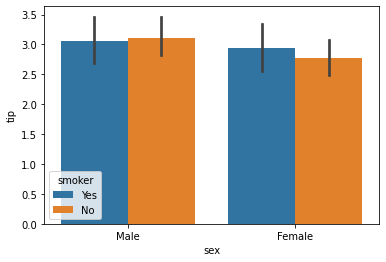

In [111]:
sns.barplot(data=tips, x='sex', y='tip', hue='smoker', estimator= np.mean) 

# Scatter plot

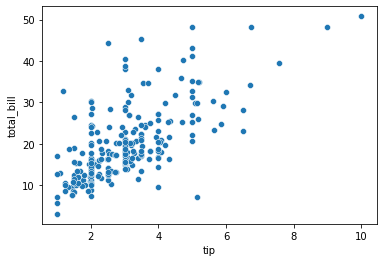

In [127]:
# tip ~ total_bill
sns.scatterplot(data=tips, x = tips.tip, y = tips.total_bill)

plt.show()

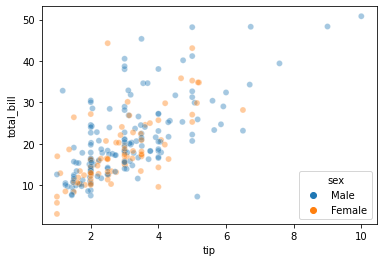

In [131]:
# tip ~ total_bill + sex
sns.scatterplot(data=tips, x = tips.tip, y = tips.total_bill, hue='sex', alpha = 0.4)
plt.show()

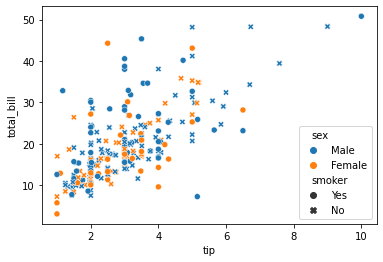

In [129]:
# tip ~ total_bill + sex + shape
sns.scatterplot(data=tips, x = tips.tip, y = tips.total_bill, hue='sex', style='smoker')
plt.show()

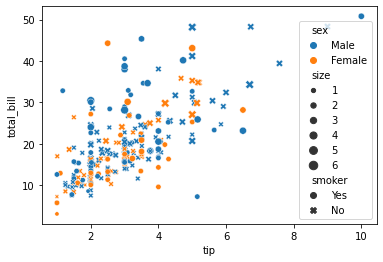

In [132]:
# tip ~ total_bill + color=hue + shape=style + size
sns.scatterplot(data=tips, x = tips.tip, y = tips.total_bill, hue='sex', style='smoker', size = 'size')
plt.show()

# Category plot

* 카테고리별로 subplot들을 생성하고 통계값(평균, 표준편차 등...)을 계산해서 각각의 subplot에 같은 종류의 그래프들을 시각화
* `kind(“strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “bar”, or “count”.)`

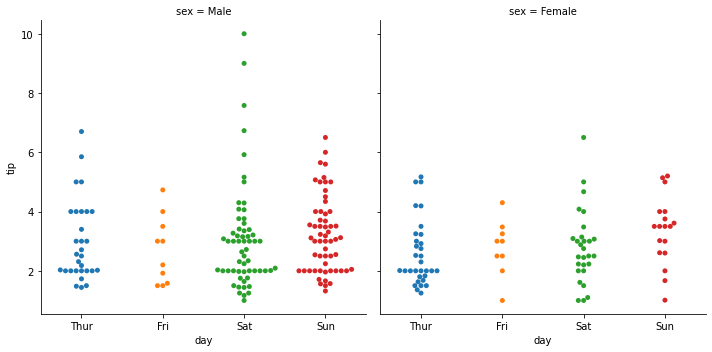

In [155]:
# 요일별 팁의 평균 막대 그래프를 흡연여부별로 subplot을 생성.

sns.catplot(data=tips, x = 'day', y = 'tip', kind ='swarm', col = 'sex')

# ex

## ex1. catplot

1. 요일별 tip의 평균 막대 그래프 + 시간별 subplot
2. 요일별 tip의 평균 막대 그래프 + 흡연여부, 시간별
3. 요일별 성별 tip의 평균 막대 + 시간

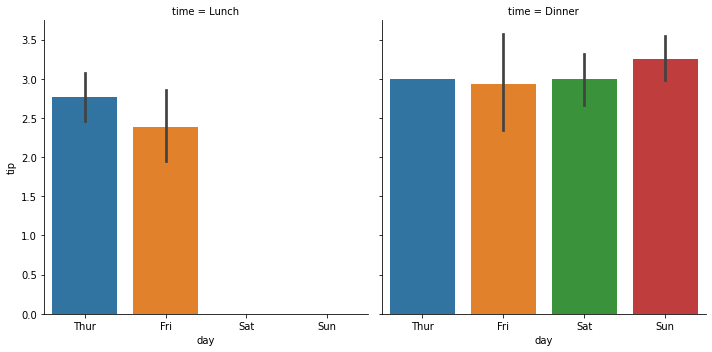

In [158]:
#1.
sns.catplot(data=tips, x = 'day', y = 'tip', kind ='bar', col = 'time')

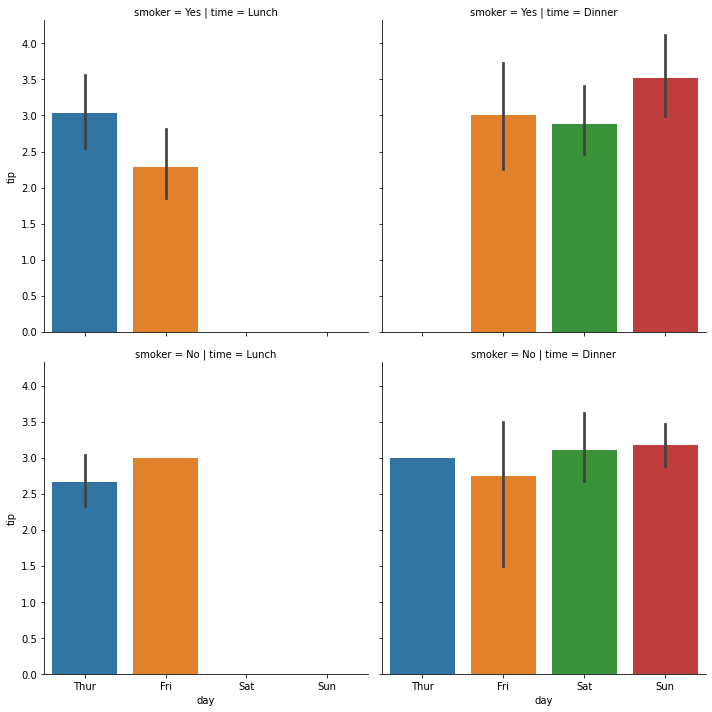

In [162]:
#2.
sns.catplot(data=tips, x = 'day', y = 'tip', kind ='bar',row='smoker' ,col = 'time')

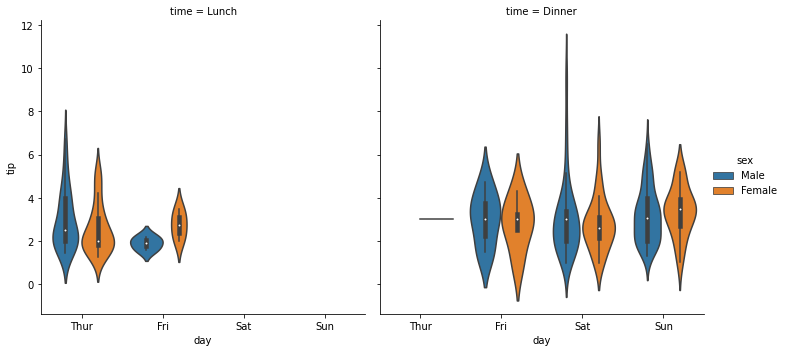

In [172]:
#3.
sns.catplot(data=tips, x = 'day', y = 'tip', hue='sex', kind ='violin' ,col = 'time')

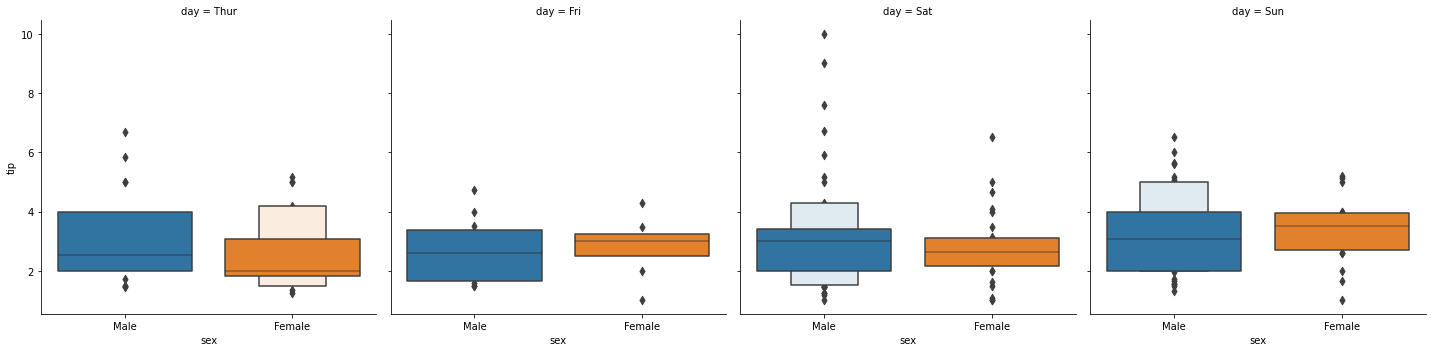

In [173]:
#4.
sns.catplot(data=tips, x = 'sex', y = 'tip', kind ='boxen' ,col = 'day')